In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data
data = pd.read_csv('numerical-users-fusers-7.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            2816 non-null   float64
 1   statuses_count                2816 non-null   float64
 2   followers_count               2816 non-null   float64
 3   friends_count                 2816 non-null   float64
 4   favourites_count              2816 non-null   float64
 5   listed_count                  2816 non-null   float64
 6   created_at                    2816 non-null   float64
 7   url                           2816 non-null   float64
 8   lang                          2816 non-null   float64
 9   time_zone                     2816 non-null   float64
 10  location                      2816 non-null   float64
 11  default_profile               2816 non-null   float64
 12  geo_enabled                   2816 non-null   float64
 13  pro

In [3]:
columns=data.columns
fake = data['fake'] 
data.drop(columns= ['fake'], inplace=True)
columns=data.columns

In [4]:
data.head(3)

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,location,default_profile,geo_enabled,profile_banner_url,profile_use_background_image,gender_code,description_length,followers_to_friends_ratio
0,3610511.0,20370.0,5470.0,2385.0,145.0,52.0,0.0,1.0,5.0,28.0,1005.0,0.0,0.0,1.0,1.0,2.0,151.0,2.293501
1,5656162.0,3131.0,506.0,381.0,9.0,40.0,322.0,1.0,1.0,28.0,1021.0,0.0,0.0,0.0,1.0,-2.0,104.0,1.328084
2,5682702.0,4024.0,264.0,87.0,323.0,16.0,2423.0,1.0,1.0,28.0,551.0,0.0,0.0,1.0,1.0,0.0,22.0,3.034483


# PCA

https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

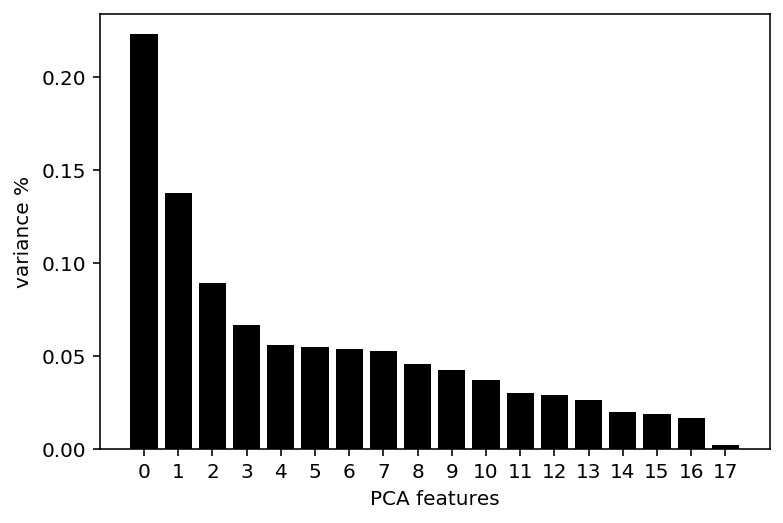

In [5]:
# Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(data)
# Create a PCA instance: pca
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [6]:
pca_data=PCA_components.iloc[:,:1]

# data visualization

In [7]:
#pca_data.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10', 'PC11', 'PC12', 'PC13','PC14', 'PC15','PC16','PC17']
pca_data.columns=['PC1']

Iris Dataset Visualization and Machine Learning

https://www.kaggle.com/xuhewen/iris-dataset-visualization-and-machine-learning

Text(0.5, 1.0, 'D1')

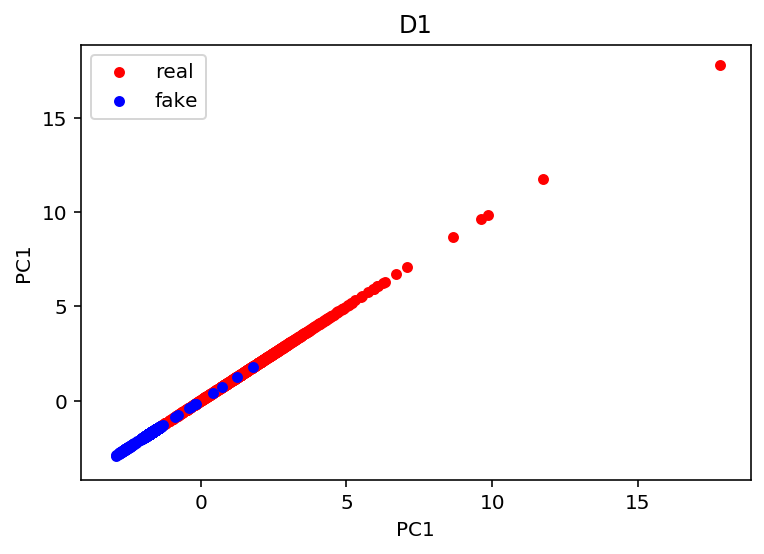

In [8]:
ax = pca_data[fake==0].plot.scatter(x='PC1', y='PC1', color='red', label='real')
pca_data[fake==1].plot.scatter(x='PC1', y='PC1', color='blue', label='fake', ax=ax)
ax.set_title("D1")

# Implementing Agglomerative Clustering Clustering in Python

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [9]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(pca_data)
pred = clustering.labels_

In [10]:
labels_true=fake
labels_pred=pred
labels = pred
X=pca_data
y=fake

In [11]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(labels_true, labels_pred)

array([[1440,   40],
       [  11, 1325]])

In [12]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

print("Adjusted Rand index:", 
      metrics.adjusted_rand_score(labels_true, labels_pred))
print("Mutual Information based scores:", 
      metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("Homogeneity:", 
      metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness:", 
      metrics.completeness_score(labels_true, labels_pred))
print("V-measure:",
      metrics.v_measure_score(labels_true, labels_pred))
print("Fowlkes-Mallows scores:",
      metrics.fowlkes_mallows_score(labels_true, labels_pred))

print("Silhouette Coefficient:",
      metrics.silhouette_score(X, labels, metric='euclidean'))

Adjusted Rand index: 0.9288434602666149
Mutual Information based scores: 0.8735413367415606
Homogeneity: 0.8741051409352844
Completeness: 0.8730430833151055
V-measure: 0.87357378932305
Fowlkes-Mallows scores: 0.9644725378662073
Silhouette Coefficient: 0.6993515857617294


Functions to Plot KMeans, Hierarchical and DBSCAN Clustering

https://medium.com/@plog397/functions-to-plot-kmeans-hierarchical-and-dbscan-clustering-c4146ed69744

Text(0.5, 1.0, 'Agglomerative Clustering-D1')

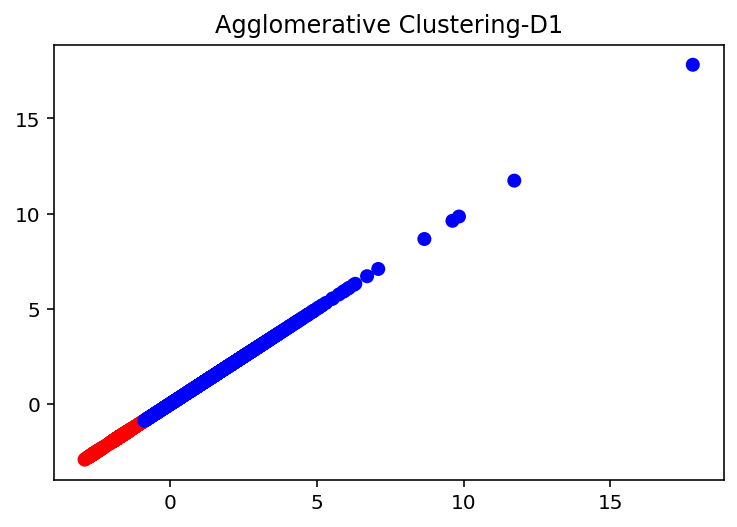

In [13]:
plt.scatter(x=pca_data.PC1, y=pca_data.PC1,c=pred, cmap='bwr')
plt.title("Agglomerative Clustering-D1")